# Автоматическая обработка текстов

## Екатерина Черняк

###  ФКН НИУ ВШЭ

### echernyak@hse.ru

# Введение

## Краткая история 

теоретическая лингвистика – корпусная лингвистика – ML & DL эра

## Основные задачи
* Машинный перевод
* Классификация текстов
    * Фильтрация спама
    * По тональности
    * По теме или жанру
* Кластеризация текстов
* Извлечение информации
    * Фактов и событий
    * Именованных сущностей
* Вопросно-ответные системы
* Суммаризация текстов
* Генерация текстов
* Распознавание речи
* Проверка правописания
* Оптическое распознавание символов
* Пользовательские эксперименты и оценка точности и качества методов

## Основные техники 
* Уровень символов:
    * Токенизация: разбиение текста на слова
    * Разбиение текста на предложения
* Уровень слов – морфология:
    * Разметка частей речи
    * Снятие морфологической неоднозначности
* Уровень предложений – синтаксис:
    * Выделенние именных или глагольных групп (chunking)
    * Выделенние семантических ролей
    * Деревья составляющих и зависимостей
* Уровень смысла – семантика и дискурс:
    * Разрешение кореферентных связей
    * Выделение синонимов
    * Анализ аргументативных связей

## Основные проблемы
* Неоднозначность
    * Лексическая неоднозначность: *орган, парить, рожки, атлас*
    * Морфологическая неоднозначность: *Хранение денег в банке. Что делают белки в клетке?*
    * Синтаксическая неоднозначность: *Мужу изменять нельзя. Его удивил простой солдат.*
* Неологизмы: *печеньки, заинстаграммить, репостнуть, расшарить, затащить, килорубли*
* Разные варианты написания: *Россия, Российская Федерация, РФ*
* Нестандартное написание: *каг дила?*

![pipeline](img/nlp_pipeline.png)

### Синтаксическая неоднозначность 
![синтаксическая неоднозначность](http://78.media.tumblr.com/d6552ff51881937371c94dc18865d711/tumblr_mo1nl6Nt9n1rwewyjo1_400.jpg)


* I saw the man. The man was on the hill. I was using a telescope.
* I saw the man. I was on the hill. I was using a telescope.
* I saw the man. The man was on the hill. The hill had a telescope.
* I saw the man. I was on the hill. The hill had a telescope.
* I saw the man. The man was on the hill. I saw him using a telescope.

# План
1.1 Предварительная обработка текстов: регулярные выражения и POS тэггинг
1.2 Векторная модель, дистрибутивная семантика: word2vec
2. Классификация текстов: FNN, CNN
3. Языковые модели и извлечение информации: RNN 
4. Машинный перевод: seq2seq 

## План на сегодня
1. Знакомство с инструментами обработки русского языка 
2. word2vec 

# Токенизация и подсчет количества слов


## Анализ  сообщений vk.com

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import pandas as pd

df = pd.read_csv('data/vk_texts_with_sources.csv', usecols = ['text', 'source'])

df.text.dropna(inplace = True)
df.head()



,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


### Длины текстов (в символах)

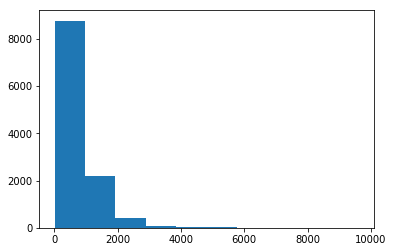

In [79]:
fig, ax = plt.subplots()

length = len_data[len_data < 10000].tolist()

n, bins, patches = ax.hist(length)

fig.show()

## Токенизация

Используем регулярные выражения, чтобы разбить тексты на слова

In [80]:
import re
import regex




def words_only(text):
    try:
        tmp = re.sub(r'\W+', ' ', text)
        tmp = regex.sub(u'[\p{Latin}]', u'', tmp)
        return ' '.join(tmp.split())
    except:
        return ""


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

df.text.iloc[0]

'начальник главного оперативного управления генерального штаба вооруженных сил рф генерал полковник сергей рудской провел брифинг для сми по ситуации в сирии с начала этого года сирийскими правительственными войсками при поддержке вкс россии достигнуты значительные успехи по освобождению ключевых районов сирии от остатков террористических группировок это восточная часть провинции идлиб пригороды дамаска восточная гута восточный каламун ярмук северные районы провинции хомс которые в настоящее время находятся полностью под контролем правительственных войск в январе феврале в восточной части провинции идлиб была окружена и уничтожена крупная группировка джабхат ан нусра численностью более 1500 боевиков а также разрозненные бандгруппы игиловцев в результате под контроль правительственных войск перешла территория от кафер аккара до саббура с севера на юг и от синджара до эль хаммам с запада на восток площадью более четырех тысяч 300 квадратных километров в настоящее время возобновлено движе

### Самые частые слова

In [81]:
from collections import Counter
n_types = []
n_tokens = []
tokens = []
cnt = Counter()
for index, row in df.iterrows():
    tokens = row['text'].split()
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(cnt.values()))
for i in cnt.most_common(10):
    print(i)

('в', 39499)
('и', 29649)
('на', 17271)
('по', 14796)
('с', 11778)
('россии', 9444)
('мвд', 5448)
('из', 4854)
('для', 4635)
('а', 3975)


### Закон Ципфа

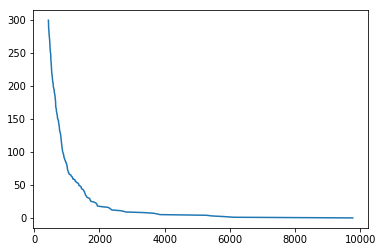

In [82]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### Закон Хипса

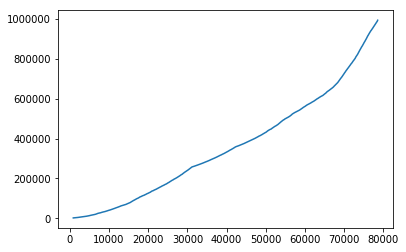

In [83]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()

### Сегментация предложений

"?", "!" как правило однозначны. Проблемы возникают с ".".

Бинарный классификатор для сегментации предложений: для каждой точки "." определить, является ли она концом предложения или нет.


In [84]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/katya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
from nltk.tokenize import sent_tokenize

text = 'Первое предложение. Второе предложение! И, наконец, третье?'
sents = sent_tokenize(text)

print(len(sents))
print(*sents, sep='\n')

3
Первое предложение.
Второе предложение!
И, наконец, третье?


# Морфологический анализ

### Задачи морфологического анализа
* Разбор слова — определение нормальной формы  (леммы), основы (стема) и грамматических характеристик слова
* Синтез слова — генерация слова по заданным грамматическим характеристикам


### Морфологический процессор – инструмент морфологического анализа
* Морфологический словарь 
* Морфологический анализатор

### Лемматизация 
У каждого слова есть *лемма* (нормальная форма): 

* кошке, кошку, кошкам, кошкой $\implies$ кошка
* бежал, бежит, бегу $\implies$  бежать
* белому, белым, белыми $\implies$ белый

In [86]:
sent1 = 'Действительно, на его лице не отражалось никаких чувств – ни проблеска сочувствия не было на нем, а ведь боль просто невыносима'
sent2 = 'У страха глаза велики .'

In [87]:
from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()
lemmas1 = [m.parse(word)[0].normal_form for word in sent1.split()]
print(' '.join(lemmas1))

действительно, на он лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на нем, а ведь боль просто невыносимый


In [88]:
from pymystem3 import Mystem

m = Mystem()
lemmas2 = m.lemmatize(sent1)
print(''.join(lemmas2))

действительно, на его лицо не отражаться никакой чувство – ни проблеск сочувствие не быть на немой, а ведь боль просто невыносимый



### Стемминг
Слова состоят из морфем: $word = stem + affixes$. Стемминг позволяет отбросить аффиксы. Чаще всего используется алгоритм Портера.

* 1-ый вид ошибки: белый, белка, белье $\implies$  бел

* 2-ой вид ошибки: трудность, трудный $\implies$  трудност, труд 

* 3-ий вид ошибки: быстрый, быстрее $\implies$  быст, побыстрее $\implies$  побыст

Алгоритм Портера состоит из 5 циклов команд, на каждом цикле – операция удаления / замены суффикса. Возможны вероятностные расширения алгоритма.


In [89]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['распределение', 'приставить', 'сделала', 'словообразование']
for w in words:
    stem = stemmer.stem(w)
    print(stem)

распределен
пристав
сдела
словообразован


### Разбор слова 

In [90]:
word1 = 'ГАИ'

In [91]:
m = MorphAnalyzer()
m.parse(word1)

[Parse(word='гаи', tag=OpencorporaTag('NOUN,anim,masc,Name plur,nomn'), normal_form='гай', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 41, 6),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,masc plur,nomn'), normal_form='гай', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 495, 7),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,masc plur,accs'), normal_form='гай', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 495, 10),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,nomn'), normal_form='гаи', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 645, 0),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,gent'), normal_form='гаи', score=0.1111111111111111, methods_stack=((<DictionaryAnalyzer>, 'гаи', 645, 1),)),
 Parse(word='гаи', tag=OpencorporaTag('NOUN,inan,femn,Sgtm,Fixd,Abbr,Orgn sing,datv'), normal_form='гаи', scor

In [92]:
m = Mystem()
m.analyze(word1)

[{'analysis': [{'gr': 'S,сокр,ед,жен,неод=(пр|вин|дат|род|твор|им)',
    'lex': 'гаи'}],
  'text': 'ГАИ'},
 {'text': '\n'}]

### Удаление стоп-слов

In [93]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [94]:
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
 

In [95]:
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

In [96]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""


In [97]:
df.text = df.text.apply(remove_stopwords) 
df.text = df.text.apply(lemmatize)
df.text = df.text.apply(remove_stoplemmas) 

In [98]:
lemmata = []
for index, row in df.iterrows():
    lemmata += row['text'].split()
fd = FreqDist(lemmata)
for i in fd.most_common(10):
    print(i)

('россия', 9769)
('полиция', 6128)
('год', 5823)
('мвд', 5448)
('москва', 5284)
('сотрудник', 3857)
('почтовый', 3772)
('мчс', 3670)
('г', 3637)
('почта', 3392)
